In [24]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [25]:
# Load vehicle data set into pandas
vehicle_data = pd.read_csv("../Resources/singapore-motor-vehicle-population.csv")
vehicle_data.head()

,year,type,engine,number
0,2006,Cars,Petrol,471707
1,2006,Cars,Diesel,7
2,2006,Cars,Petrol-Electric,379
3,2006,Cars,Petrol-Electric (Plug-In),0
4,2006,Cars,Petrol-CNG,214


In [26]:
vehicle_data.engine.value_counts()

engine
Petrol                       65
Electric                     65
Diesel                       52
Petrol-Electric              52
Petrol-CNG                   52
CNG                          52
Diesel-Electric              39
Petrol-Electric (Plug-In)    13
Name: count, dtype: int64

In [27]:
vehicle_data['type'].value_counts()

vehicle_data['engine'].value_counts()

year = vehicle_data.loc[(vehicle_data['type']=='Cars') & (vehicle_data['engine']=='Petrol-Electric'), 'year']
pe_cars = vehicle_data.loc[(vehicle_data['type']=='Cars') & (vehicle_data['engine']=='Petrol-Electric'), 'number']

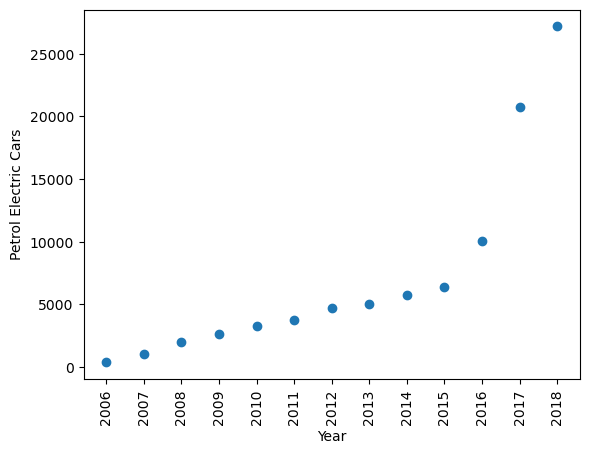

In [28]:
# Generate a scatter plot of year versus number of petrol-electric cars
plt.scatter(year, pe_cars)
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Petrol Electric Cars')
plt.show()

In [29]:
# Perform a linear regression on year versus petrol-electric cars
m, b, corr, pvalue, stderr = stats.linregress(year, pe_cars)

In [30]:
# Create equation of line to calculate predicted number of petrol-electric cars
y_line_pe = m*year + b

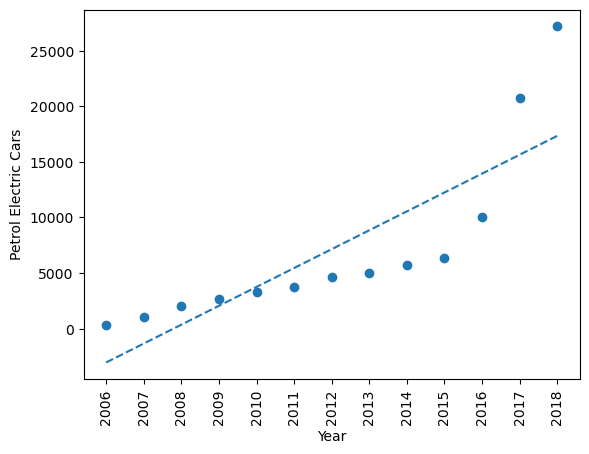

In [31]:
# Plot the linear model on top of scatter plot 
# Generate a scatter plot of year versus number of petrol-electric cars
plt.scatter(year, pe_cars)
plt.xticks(year, rotation=90)
plt.plot(year,y_line_pe,"--")
plt.xlabel('Year')
plt.ylabel('Petrol Electric Cars')
plt.show()

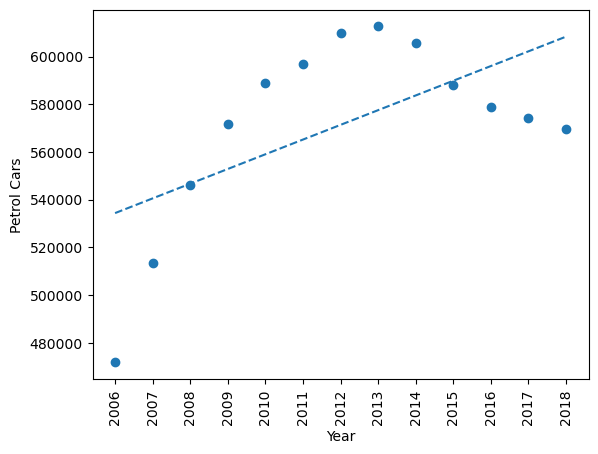

In [32]:
# Repeat plotting scatter and linear model for year versus petrol cars
pcars = vehicle_data.loc[(vehicle_data['type']=='Cars') & (vehicle_data['engine']=='Petrol'), 'number']
m, b, corr, pvalue, stderr = stats.linregress(year, pcars)
y_line_p = m*year + b


# Generate a scatter plot of year versus number of petrol-electric cars
plt.scatter(year, pcars)
plt.xticks(year, rotation=90)
plt.plot(year,y_line_p,"--")
plt.xlabel('Year')
plt.ylabel('Petrol Cars')
plt.show()

In [33]:
# # Repeat plotting scatter and linear model for year versus electric cars
# # Repeat plotting scatter and linear model for year versus petrol cars
# ecars = vehicle_data.loc[(vehicle_data['type']=='Cars') & (vehicle_data['engine']=='Electric'), 'number']
# m, b, corr, pvalue, stderr = stats.linregress(year, ecars)
# y_line = m*year + b


# # Generate a scatter plot of year versus number of petrol-electric cars
# plt.scatter(year, ecars)
# plt.xticks(year, rotation=90)
# plt.plot(year,y_line,"--")
# plt.xlabel('Year')
# plt.ylabel('Electric Cars')
# plt.show()

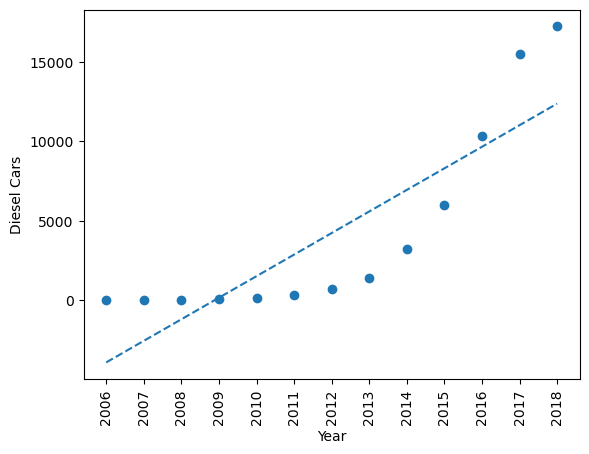

In [34]:
# Repeat plotting scatter and linear model for year versus electric cars
# Repeat plotting scatter and linear model for year versus petrol cars
ecars = vehicle_data.loc[(vehicle_data['type']=='Cars') & (vehicle_data['engine']=='Diesel'), 'number']
m, b, corr, pvalue, stderr = stats.linregress(year, ecars)
y_line_d = m*year + b


# Generate a scatter plot of year versus number of petrol-electric cars
plt.scatter(year, ecars)
plt.xticks(year, rotation=90)
plt.plot(year,y_line_d,"--")
plt.xlabel('Year')
plt.ylabel('Diesel Cars')
plt.show()

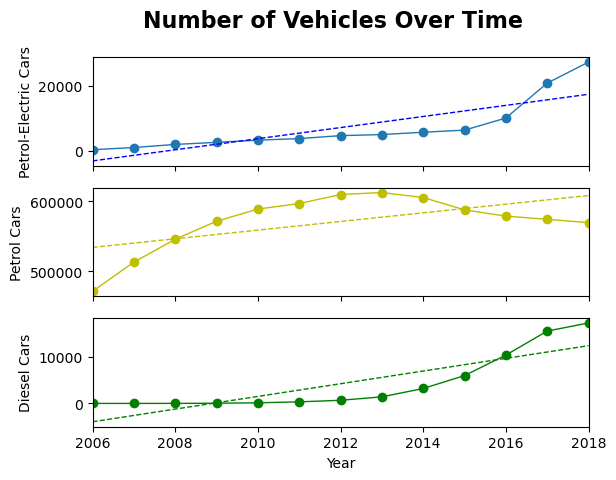

In [35]:
# Generate a facet plot of all 3 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Number of Vehicles Over Time", fontsize=16, fontweight="bold")

ax1.set_xlim(min(year), max(year))
ax1.plot(year, pe_cars, linewidth=1, marker="o")
ax1.plot(year, y_line_pe, "b--", linewidth=1)
ax1.set_ylabel("Petrol-Electric Cars")

ax2.plot(year, pcars, linewidth=1, marker="o", color="y")
ax2.plot(year, y_line_p, "y--", linewidth=1)
ax2.set_ylabel("Petrol Cars")

ax3.plot(year, ecars, linewidth=1, marker="o", color="g")
ax3.plot(year, y_line_d, "g--", linewidth=1)
ax3.set_ylabel("Diesel Cars")
ax3.set_xlabel("Year")

plt.show()

In [36]:
year=2024
print(f"The number of diesel cars in 2024 will be {round(m * year + b,0)}.")

The number of diesel cars in 2024 will be 20541.0.
